In [10]:
! pip install dtw

  Using cached dtw-1.4.0-py3-none-any.whl


In [11]:
from twi_ksvd.omp import OMP
import numpy as np

## Test and usage of OMP

### Syntethic data

In [12]:
p = 10
K = 100
N = 100
x = np.ones(p)
X = np.random.random((p, N))
D = np.random.random((p, K))

### Test

In [13]:
alpha = OMP(x, D, 3)

np.linalg.norm(x - D @ alpha)

c:\users\paple\documents\3a\mva\twi-ksvd\src\twi_ksvd\omp.py:44: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha_partial = lstsq(D_partial, x)[0]


0.1631314478581577

## Test and usage of COSTW

In [18]:
from twi_ksvd.costw import COSTW
from dtw import dtw

t1 = np.arange(200)
t2 = np.arange(100)


x1 = 2*np.random.random(200)-1
y1 = np.cos(5*t2)


In [15]:
%%timeit
costw, delta = COSTW(x1,y1)

596 ms ± 70.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
costw, delta = COSTW(x1,y1, r_window=20)

The slowest run took 4.10 times longer than the fastest. This could mean that an intermediate result is being cached.
233 ms ± 127 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:

manhattan_distance = lambda x, y: np.abs(x - y)
d, cost_matrix, acc_cost_matrix, path= dtw(x1, y1, dist=manhattan_distance)

In [43]:
# align.normalizedDistance

delta = np.zeros((x1.shape[0], y1.shape[0]), dtype=int)

for i,j in zip(path[0], path[1]):
    delta[i,j] = 1



NameError: name 'plt' is not defined

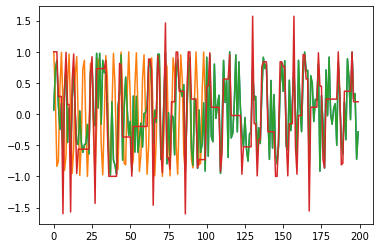

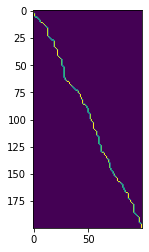

In [45]:
import matplotlib.pyplot as plt

plt.plot(t1, x1)
plt.plot(t2, y1)
plt.plot(t1, x1)
plt.plot(t1, delta @ y1)
plt.show()
plt.imshow(delta)

In [47]:
(delta @ np.ones(delta.shape[1]) == 1).all()

False

In [48]:
(delta @ y1).shape == x1.shape

True

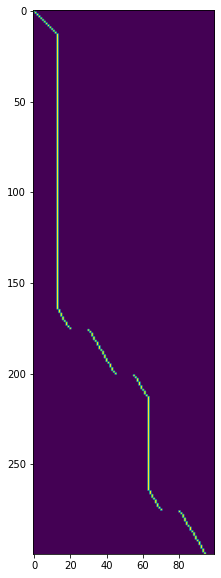

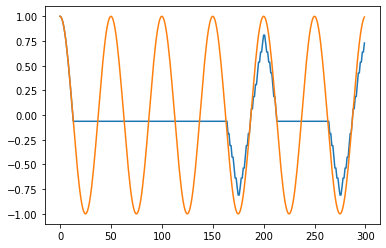

In [49]:
# Identical signal

t1 = np.arange(300)
t2 = np.arange(100)

y2= np.cos(2*np.pi/50*t2)
y1 = np.cos(2*np.pi/50*t1)


costw, delta = COSTW(y1,y2)
plt.figure(figsize=(10,10))
plt.imshow(delta)
plt.show()
plt.plot(delta@y2)
plt.plot(y1)

0.8119907139383994


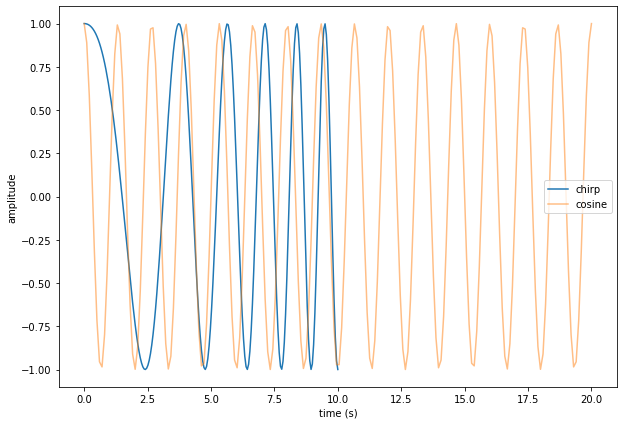

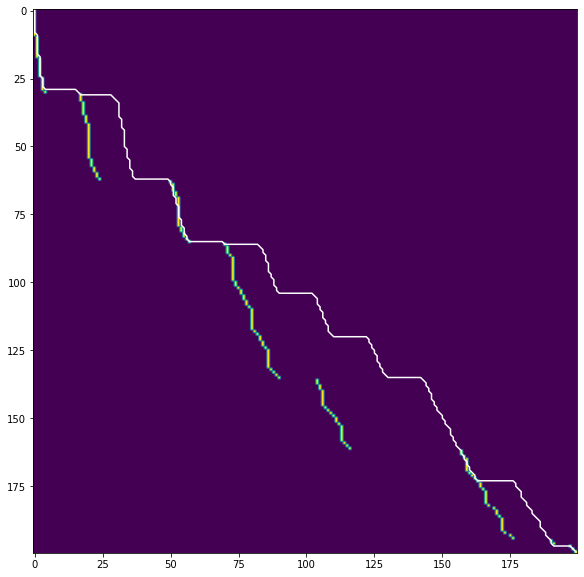

0.9450797353175899


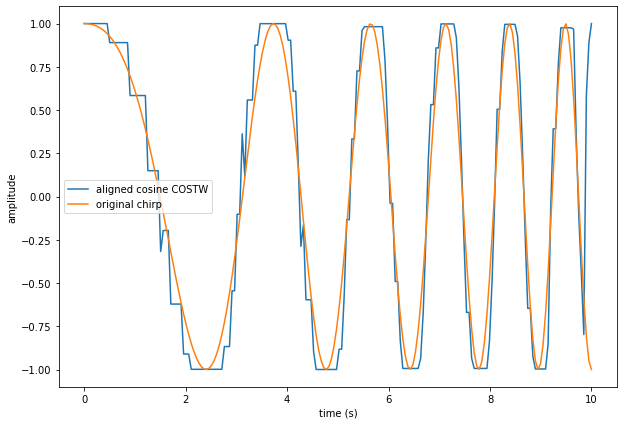

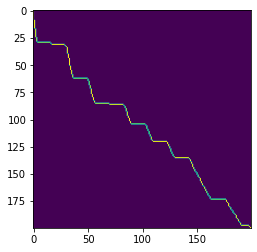

0.9549018746761087


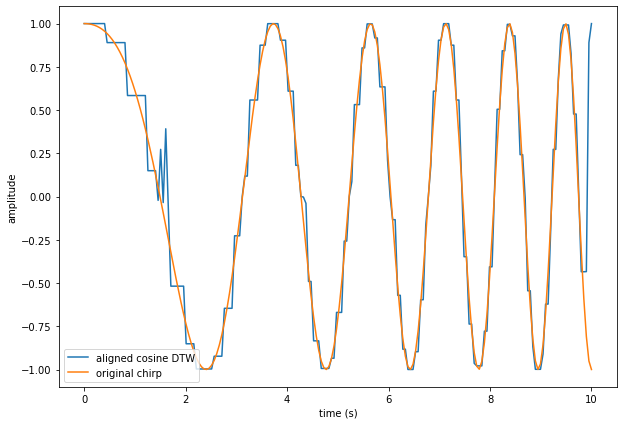

In [120]:
# chirp
cosine_distance = lambda x, y: np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
# cosine_distance = lambda x, y: np.linalg.norm(x-y,1)
from scipy.signal import chirp
t = np.linspace(0, 10, 200)
t2 =  np.linspace(0, 20, 200)
w = chirp(t, f0=0.1, f1=1,t1=10, method='linear')

k = np.cos(2*np.pi*9.2*t2)
# k = w[::-1]
plt.figure(figsize =(10,7))

plt.plot(t,w, label = "chirp")
plt.plot(t2, k, label = "cosine", alpha = 0.5)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.legend()

costw, delta = COSTW(w,k,r_window=200)
print(costw)

plt.figure(figsize= (10,10))
plt.imshow(delta)
plt.plot(path[1],path[0],"w")
plt.show()

plt.figure(figsize =(10,7))
plt.plot(t,delta@k, label = "aligned cosine COSTW")
print(cosine_distance(delta@k,w))
plt.plot(t,w, label= "original chirp")
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

d, cost_matrix, acc_cost_matrix, path= dtw(w, k, dist=manhattan_distance)
delta = np.zeros((w.shape[0], k.shape[0]), dtype=int)
for i,j in zip(path[0], path[1]):
    delta[i,j] = 1
plt.imshow(delta)

plt.show()
plt.figure(figsize =(10,7))
row_sums = delta.sum(axis=1)
delta_norm = delta / row_sums[:, np.newaxis]
plt.plot(t,delta_norm@k, label = "aligned cosine DTW")
plt.plot(t,w, label= "original chirp")
print(cosine_distance(delta_norm@k,w))
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

## Test and usage of TWI-OMP

In [ ]:
from twi_ksvd.omp import TWI_OMP

D_list = [D[:,j] for j in range(D.shape[1])]

alpha, deltas = TWI_OMP(x, D_list, 3)

In [ ]:
len(deltas)

In [ ]:

approx = np.zeros_like(x)

for j in range(len(D_list)):
    if alpha[j] != 0:
        approx += alpha[j] * deltas[j] @ D_list[j]

np.linalg.norm(x - approx)

## Test and usage of kSVD

In [ ]:
from twi_ksvd.ksvd import kSVD
model = kSVD( 10)
tau = 3
model. fit(X,D,tau )

# Test and Usage of TWI-kSVD

In [ ]:
import numpy as np
from twi_ksvd.ksvd import TWI_kSVD
model = TWI_kSVD( 10)
X = np.random.random((100,4))
D = np.random.random((100,10)).T
tau = 3
model. fit(X,D,tau, r_window=10)